# -Importing and Data Preprocessing

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
import pandas as pd

import datetime

import warnings
warnings.filterwarnings('ignore')

Metadata atau data dictionary

1. Row ID => Unique ID for each row.
2. Order ID => Unique Order ID for each Customer.
3. Order Date => Order Date of the product.
4. Ship Date => Shipping Date of the Product.
5. Ship Mode=> Shipping Mode specified by the Customer.
6. Customer ID => Unique ID to identify each Customer.
7. Customer Name => Name of the Customer.
8. Segment => The segment where the Customer belongs.
9. Country => Country of residence of the Customer.
10. City => City of residence of of the Customer.
11. State => State of residence of the Customer.
12. Postal Code => Postal Code of every Customer.
13. Region => Region where the Customer belong.
14. Product ID => Unique ID of the Product.
15. Category => Category of the product ordered.
16. Sub-Category => Sub-Category of the product ordered.
17. Product Name => Name of the Product
18. Sales => Sales of the Product.
19. Quantity => Quantity of the Product.
20. Discount => Discount provided.
21. Profit => Profit/Loss incurred.

In [61]:
df=pd.read_csv('Sample - Superstore.csv',encoding='ISO-8859-1')

In [18]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [103]:
df.Category.value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [63]:
df['Order Date']=pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
df['Ship Date']=pd.to_datetime(df['Ship Date'], format='%m/%d/%Y')

In [64]:
df['OrderY']=df['Order Date'].dt.year
df['OrderM']=df['Order Date'].dt.month
df['OrderD']=df['Order Date'].dt.day

In [65]:
df['Profitability']=df['Profit']/df['Sales']

In [66]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,OrderY,OrderM,OrderD,Profitability
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,8,0.1600
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,8,0.3000
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6,12,0.4700
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,11,-0.4000
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10,11,0.1125


# -Which countries do they have sales?

In [68]:
df.Country.value_counts()

United States    9994
Name: Country, dtype: int64

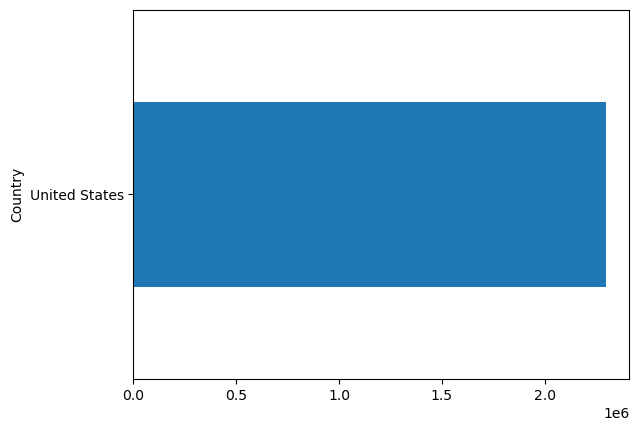

In [67]:
df.groupby('Country')['Sales'].sum().sort_values(ascending=False).head(20).plot.barh();

# All the data are in the United States.

# -Top 20 states by sales

In [71]:
df.State.value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

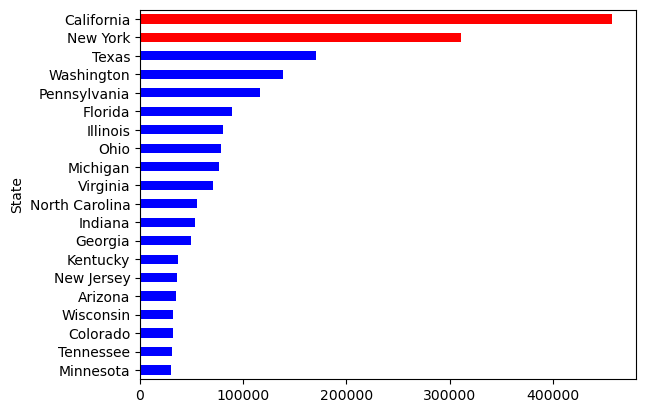

In [74]:
colors = ['blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','blue','blue',
         'blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','red','red']
df.groupby('State')['Sales'].sum().sort_values(ascending=True).tail(20).plot.barh(color=colors);

# -Top 10 states by profit

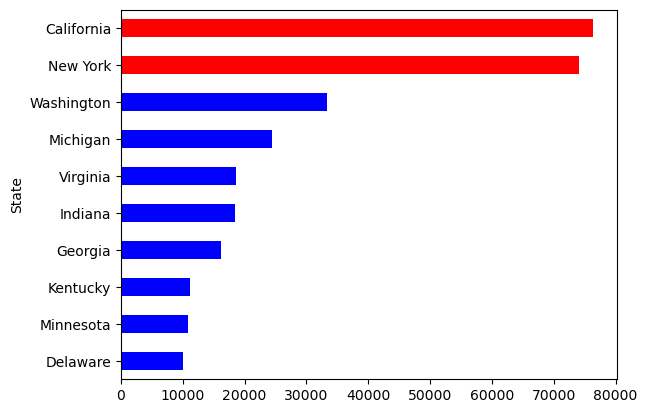

In [77]:
colors = ['blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','red','red']
df.groupby('State')['Profit'].sum().sort_values(ascending=True).tail(10).plot.barh(color=colors);

# Two important states are New York and California. New York is more profitable than California.

# -What is the difference between New York and California ?

In [78]:
df_cal=df[df['State']=='California']
df_new=df[df['State']=='New York']

# Sales and Profit scattering by customers of California

(-1000.0, 5000.0)

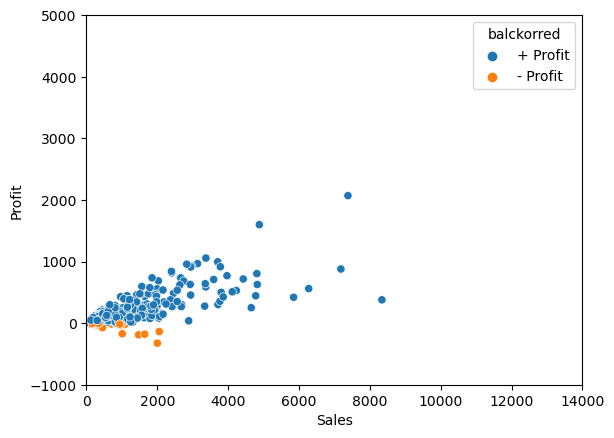

In [81]:
df_cal_customer=pd.DataFrame(df_cal.groupby('Customer Name')['Sales'].sum())
df_cal_customer['Profit']=pd.DataFrame(df_cal.groupby('Customer Name')['Profit'].sum())

def type(ex):
    if ex <0:
        return '- Profit'
    else:
        return '+ Profit'

df_cal_customer.loc[:,'balckorred']=df_cal_customer.loc[:,'Profit'].apply(type)


sns.scatterplot(data=df_cal_customer, hue='balckorred',x='Sales',y='Profit')
plt.xlim(0, 14000)
plt.ylim(-1000, 5000)

# Sales and Profit scattering by customers of New York

In [84]:
df_new.groupby('Customer Name')['Sales'].sum()

Customer Name
Aaron Hawkins          311.422
Aaron Smayling          65.780
Adam Bellavance       4438.686
Adam Hart              841.568
Adam Shillingsburg    1270.264
                        ...   
Victoria Brennan       756.800
Victoria Pisteka       198.670
Victoria Wilson       1247.640
William Brown          126.176
Zuschuss Carroll        43.920
Name: Sales, Length: 415, dtype: float64

In [83]:
df_new_customer=pd.DataFrame(df_new.groupby('Customer Name')['Sales'].sum())

In [86]:
df_new_customer

,Sales
Customer Name,
Aaron Hawkins,311.422
Aaron Smayling,65.780
Adam Bellavance,4438.686
Adam Hart,841.568
Adam Shillingsburg,1270.264
...,...
Victoria Brennan,756.800
Victoria Pisteka,198.670
Victoria Wilson,1247.640


In [85]:
df_new.groupby('Customer Name')['Profit'].sum()

Customer Name
Aaron Hawkins          144.9550
Aaron Smayling          32.2322
Adam Bellavance       1453.4346
Adam Hart              294.5488
Adam Shillingsburg     155.0168
                        ...    
Victoria Brennan        75.6800
Victoria Pisteka        31.6459
Victoria Wilson        349.3392
William Brown           53.7944
Zuschuss Carroll        12.7368
Name: Profit, Length: 415, dtype: float64

(-1000.0, 5000.0)

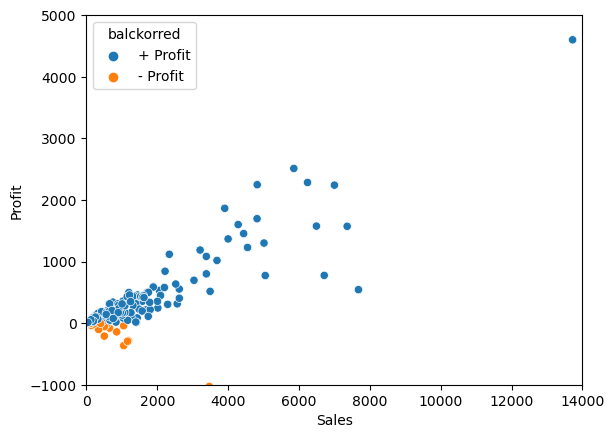

In [82]:
df_new_customer=pd.DataFrame(df_new.groupby('Customer Name')['Sales'].sum())
df_new_customer['Profit']=pd.DataFrame(df_new.groupby('Customer Name')['Profit'].sum())

def type(ex):
    if ex <0:
        return '- Profit'
    else:
        return '+ Profit'

df_new_customer.loc[:,'balckorred']=df_new_customer.loc[:,'Profit'].apply(type)


sns.scatterplot(data=df_new_customer, hue='balckorred',x='Sales',y='Profit')
plt.xlim(0, 14000)
plt.ylim(-1000, 5000)

# New York has a outstanding customer which is high sales and profit.

# - What is a outstanding customer in New York?

In [30]:
df_new_customer.sort_values(by=['Sales'],ascending=False).head()

,Sales,Profit,balckorred
Customer Name,,,
Tom Ashbrook,13723.498,4599.2073,black
Peter Fuller,7678.228,543.2819,black
Seth Vernon,7359.918,1571.7964,black
Tom Boeckenhauer,6999.960,2239.9872,black
Greg Tran,6712.744,774.7935,black


# 'Tom Ashbrook' contributes a lot to high profitability of New York.

In [90]:
#Sales and Profit of California
df_cal_customer.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,577.0,793.219465,1089.711102,3.984,110.0120,387.136,1059.0880,8341.2900
Profit,577.0,132.376754,210.395948,-325.572,18.4527,63.621,147.1346,2069.6196


In [91]:
#Sales and Profit of New York
df_new_customer.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,415.0,749.099448,1345.44571,3.64,70.214,311.422,795.305,13723.498


In [33]:
#Sales and Profit of New York without 'Tom Ashbrook'
df_new_noTom=df_new_customer[df_new_customer.index != 'Tom Ashbrook']
df_new_noTom.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,414.0,717.760321,1185.762163,3.6400,70.213000,310.89300,789.35200,7678.2280
Profit,414.0,167.727878,352.128496,-1027.4035,15.129825,56.51905,172.26315,2510.8903


# If New York does not have 'Tom Ashbook', their average sales goes down from 749 to 717,and their average profit goes down from 178 to 167.But New York is still more profitable than California.

# - Are there any difference among states in profitability ?

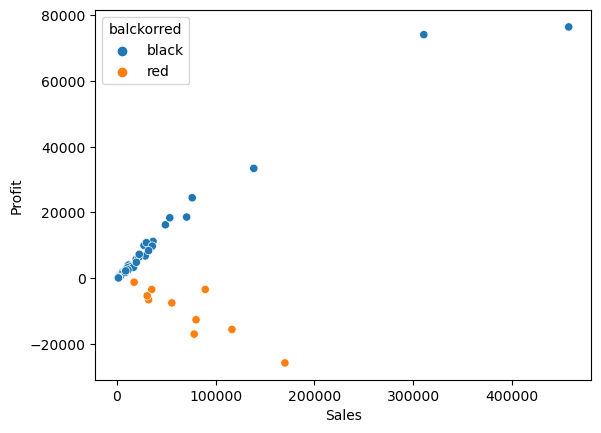

In [34]:
df_state=pd.DataFrame(df.groupby('State')['Sales'].sum())
df_state['Profit']=pd.DataFrame(df.groupby('State')['Profit'].sum())

def type(ex):
    if ex <0:
        return 'red'
    else:
        return 'black'

df_state.loc[:,'balckorred']=df_state.loc[:,'Profit'].apply(type)

sns.scatterplot(data=df_state, hue='balckorred',x='Sales',y='Profit');

# We can divide states to 'Black States'(+proift) and 'Red States'(-profit).

# -Top 20 cities by Sales

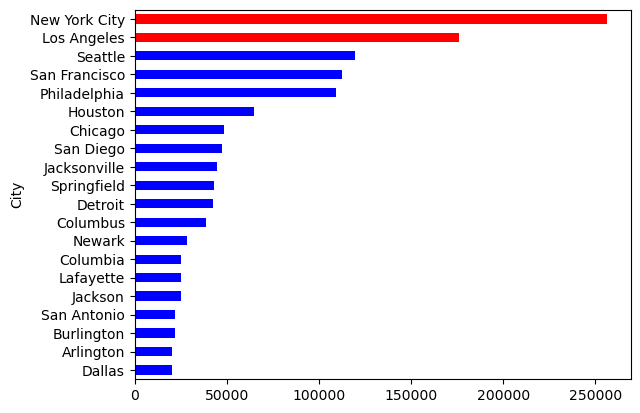

In [35]:
colors = ['blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','blue','blue',
         'blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','red','red']
df.groupby('City')['Sales'].sum().sort_values(ascending=True).tail(20).plot.barh(color=colors);

# -Top 20 cities by Profit

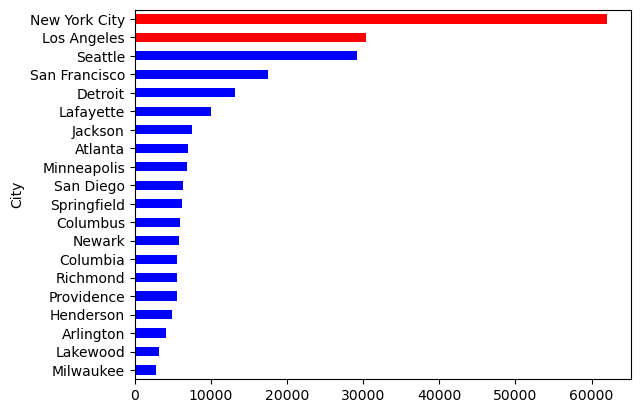

In [36]:
colors = ['blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','blue','blue',
         'blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','red','red']
df.groupby('City')['Profit'].sum().sort_values(ascending=True).tail(20).plot.barh(color=colors);

# Profitability of New York City is outstanding.

# - Are there any difference among cities in profitability ?

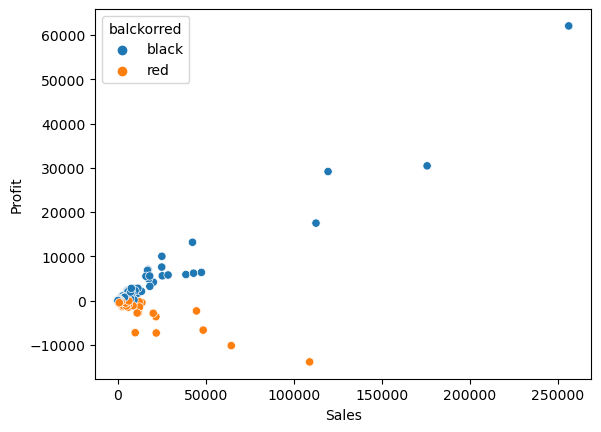

In [37]:
df_city=pd.DataFrame(df.groupby('City')['Sales'].sum())
df_city['Profit']=pd.DataFrame(df.groupby('City')['Profit'].sum())
def type(ex):
    if ex <0:
        return 'red'
    else:
        return 'black'

df_city.loc[:,'balckorred']=df_city.loc[:,'Profit'].apply(type)

sns.scatterplot(data=df_city, hue='balckorred',x='Sales',y='Profit');

# We can divide cities to 'Blue Cities' and 'Red Cities'.

# -Top 20 customers by Sales

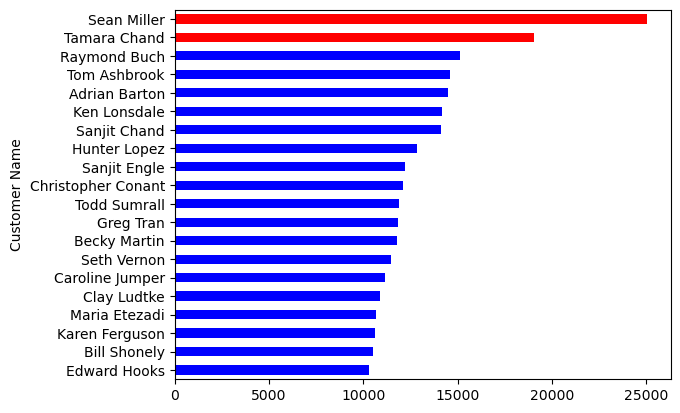

In [38]:
colors = ['blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','blue','blue',
         'blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','red','red']
df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=True).tail(20).plot.barh(color=colors);

# -Cumulative curve in Sales by Customers

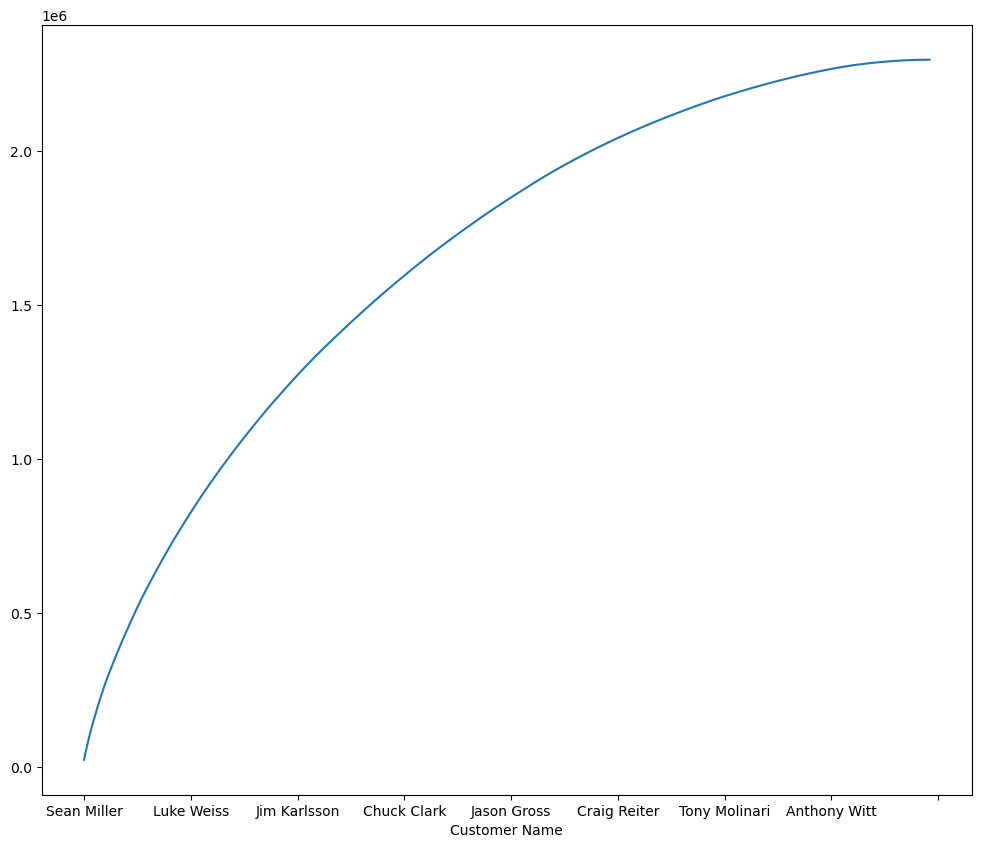

In [39]:
plt.figure(figsize=(12,10))
df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).cumsum().plot();

# -Can we apply Pareto principle to customers and Sales ?

In [92]:
df1=pd.DataFrame(df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False))

In [93]:
df1.quantile(0.7, interpolation='higher')

Sales    3288.11
Name: 0.7, dtype: float64

In [94]:
df1[df1['Sales']>=3288.11].sum()/df['Sales'].sum()

Sales    0.609223
dtype: float64

# Top 30% occupy 60% of sales!

# -Top 20 customers by Profit

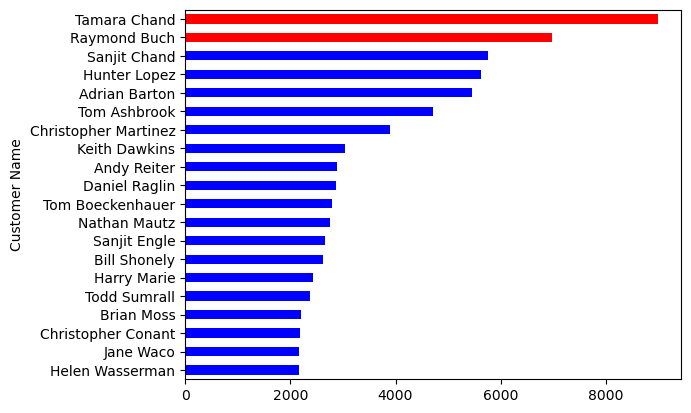

In [43]:
colors = ['blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','blue','blue',
         'blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','red','red']
df.groupby('Customer Name')['Profit'].sum().sort_values(ascending=True).tail(20).plot.barh(color=colors);

# -Cumulative curve in Profit by Customers

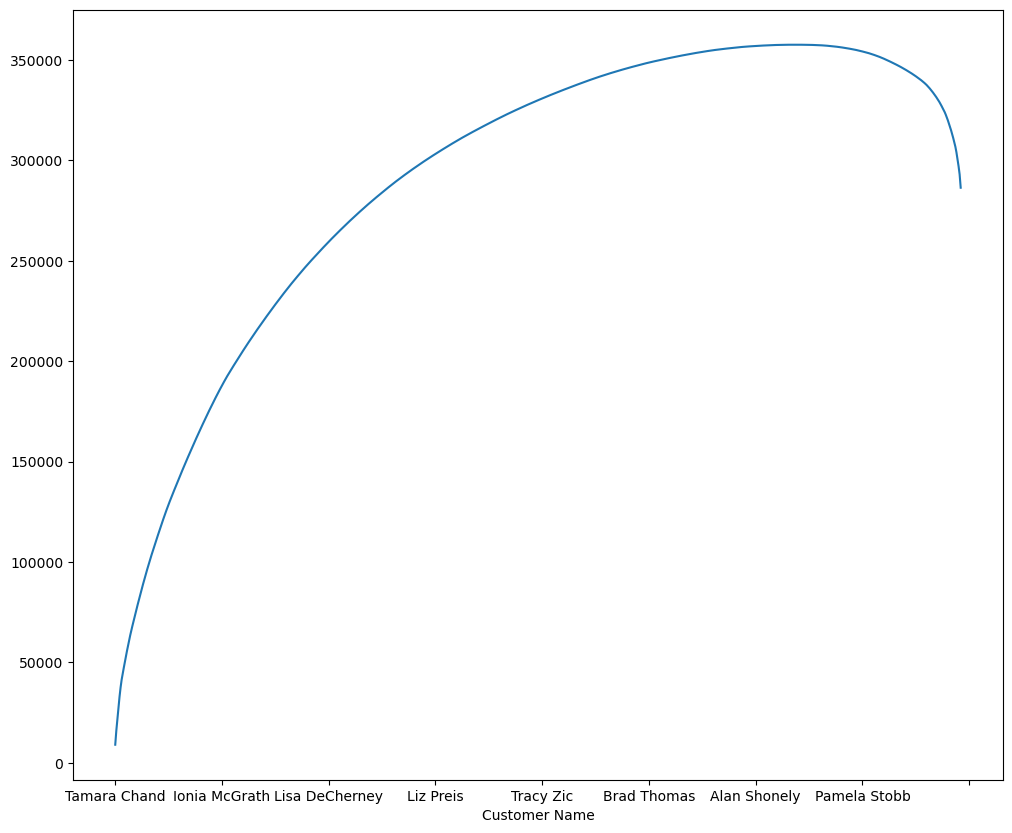

In [44]:
plt.figure(figsize=(12,10))
df.groupby('Customer Name')['Profit'].sum().sort_values(ascending=False).cumsum().plot();

# -Can we apply Pareto principle to customers and Profit ?

In [45]:
df2=pd.DataFrame(df.groupby('Customer Name')['Profit'].sum().sort_values(ascending=False))

In [46]:
df2.quantile(0.7, interpolation='higher')

Profit    463.269
Name: 0.7, dtype: float64

In [47]:
df2[df2['Profit']>=463.269].sum()/df['Profit'].sum()

Profit    0.971351
dtype: float64

# Top 30% occupy 97% of Profit! It means that how we can manage top 30% profit customers is very important !

# - Are there any difference among customers in profitability ?

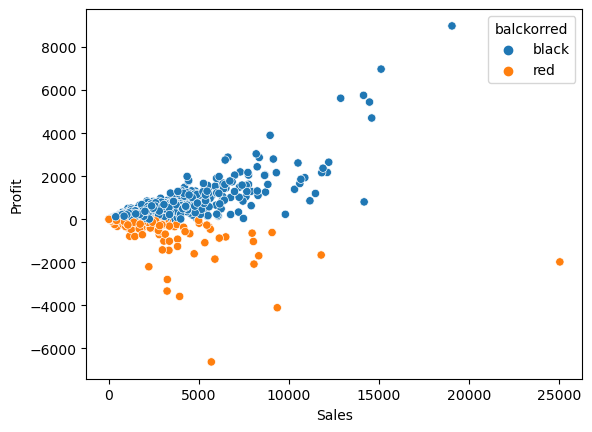

In [48]:
df_customer=pd.DataFrame(df.groupby('Customer Name')['Sales'].sum())
df_customer['Profit']=pd.DataFrame(df.groupby('Customer Name')['Profit'].sum())

def type(ex):
    if ex <0:
        return 'red'
    else:
        return 'black'

df_customer.loc[:,'balckorred']=df_customer.loc[:,'Profit'].apply(type)

sns.scatterplot(data=df_customer, hue='balckorred',x='Sales',y='Profit');

# One of problems is that top1 sales customer is in negative profit. So how we can turn it to positive is very important.

# -Sales by Categories

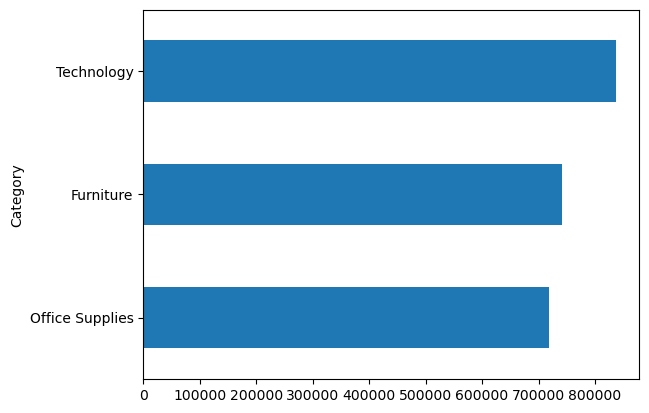

In [49]:
df.groupby('Category')['Sales'].sum().sort_values(ascending=True).plot.barh();

# -Profit by Categories

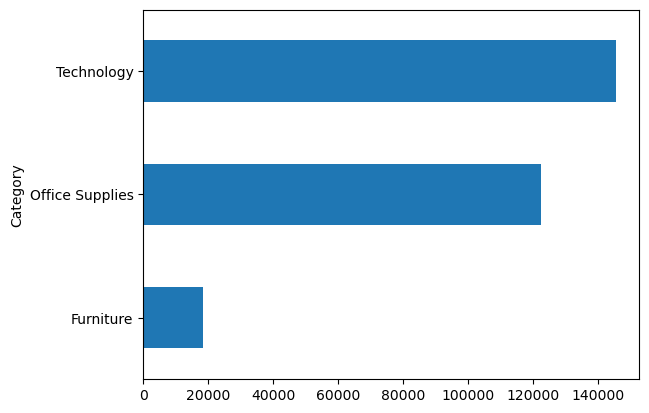

In [50]:
df.groupby('Category')['Profit'].sum().sort_values(ascending=True).plot.barh();

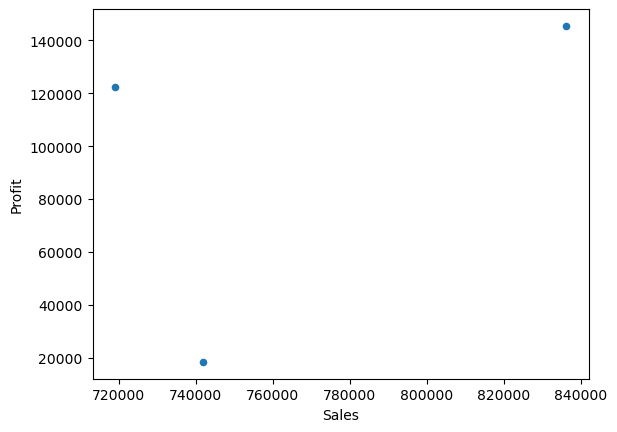

In [51]:
df_category=pd.DataFrame(df.groupby('Category')['Sales'].sum())
df_category['Profit']=pd.DataFrame(df.groupby('Category')['Profit'].sum())
df_category.plot.scatter(x='Sales',y='Profit');

# Office Supplies is most profitable !

# -Sub Categories by Sales

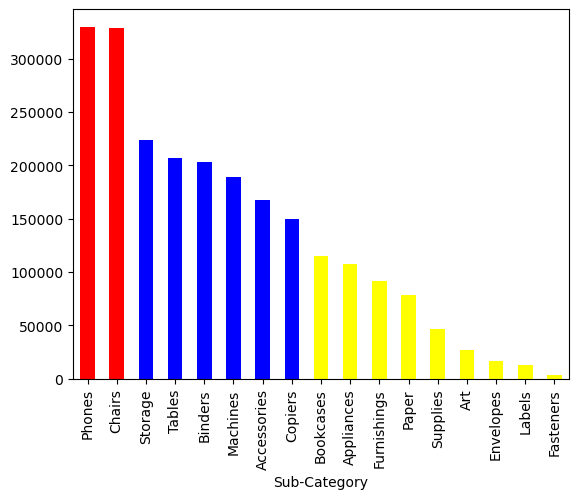

In [52]:
colors = ['red', 'red', 'blue', 'blue','blue','blue','blue','blue','yellow','yellow',
         'yellow', 'yellow', 'yellow', 'yellow','yellow','yellow','yellow']
df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).plot.bar(color=colors);

# -Sub Categories by Profit

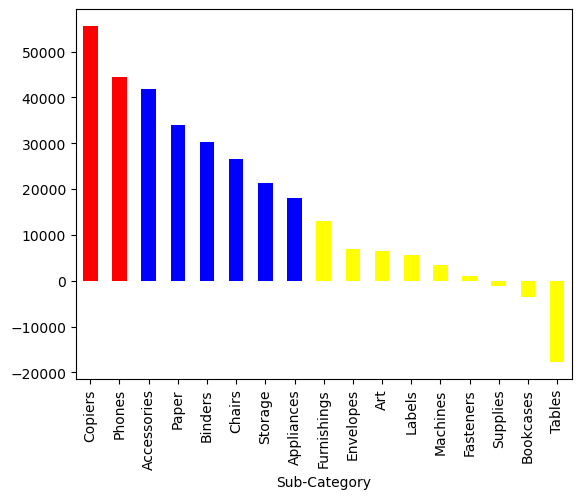

In [53]:
colors = ['red', 'red', 'blue', 'blue','blue','blue','blue','blue','yellow','yellow',
         'yellow', 'yellow', 'yellow', 'yellow','yellow','yellow','yellow']
df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).plot.bar(color=colors);

# - Are there any difference among sub categories in profitability ?

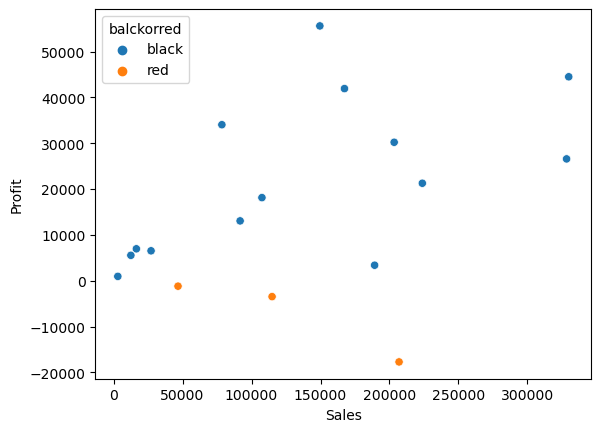

In [54]:
df_subcategory=pd.DataFrame(df.groupby('Sub-Category')['Sales'].sum())
df_subcategory['Profit']=pd.DataFrame(df.groupby('Sub-Category')['Profit'].sum())

def type(ex):
    if ex <0:
        return 'red'
    else:
        return 'black'

df_subcategory.loc[:,'balckorred']=df_subcategory.loc[:,'Profit'].apply(type)

sns.scatterplot(data=df_subcategory, hue='balckorred',x='Sales',y='Profit');

# -Time Series Analysis

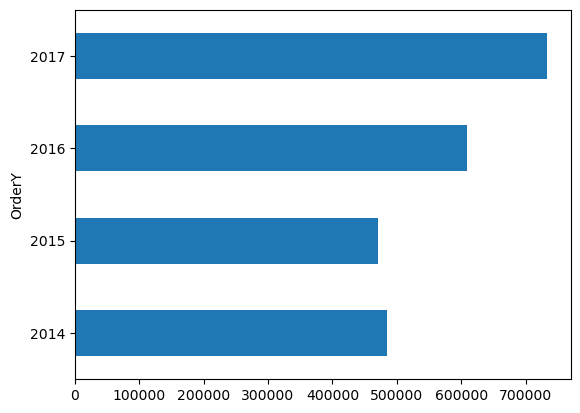

In [55]:
df.groupby('OrderY')['Sales'].sum().plot.barh();

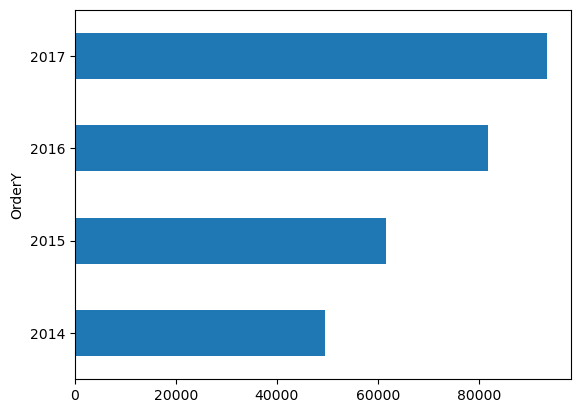

In [56]:
df.groupby('OrderY')['Profit'].sum().plot.barh();

# Sales and Profit has been growing year by year.

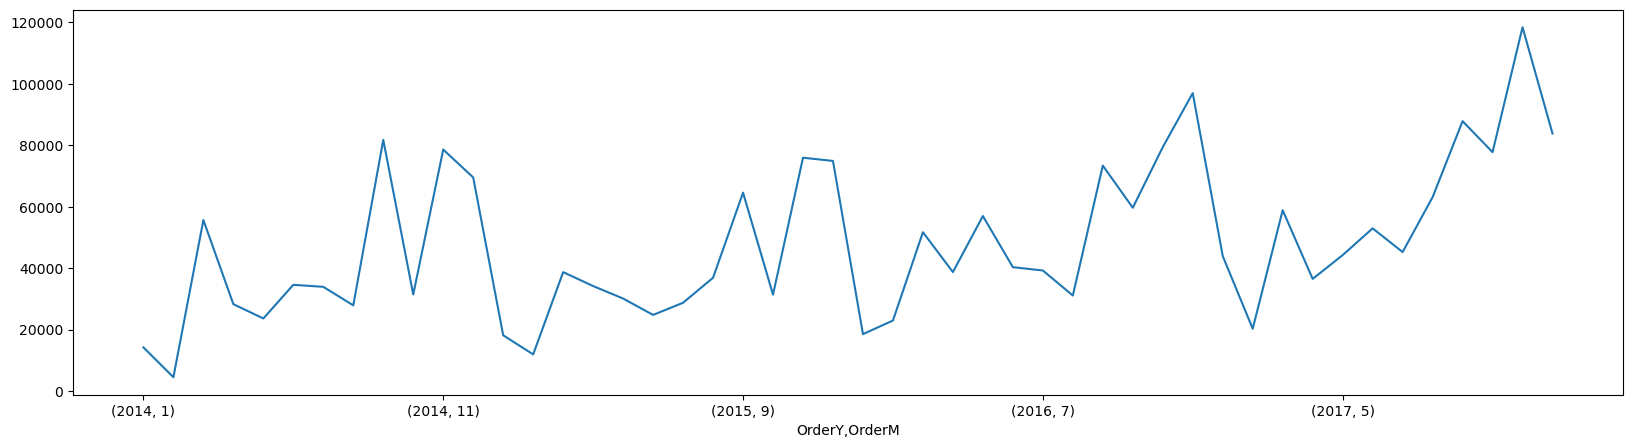

In [57]:
plt.figure(figsize=(20,5))
df.groupby(['OrderY','OrderM'])['Sales'].sum().plot();

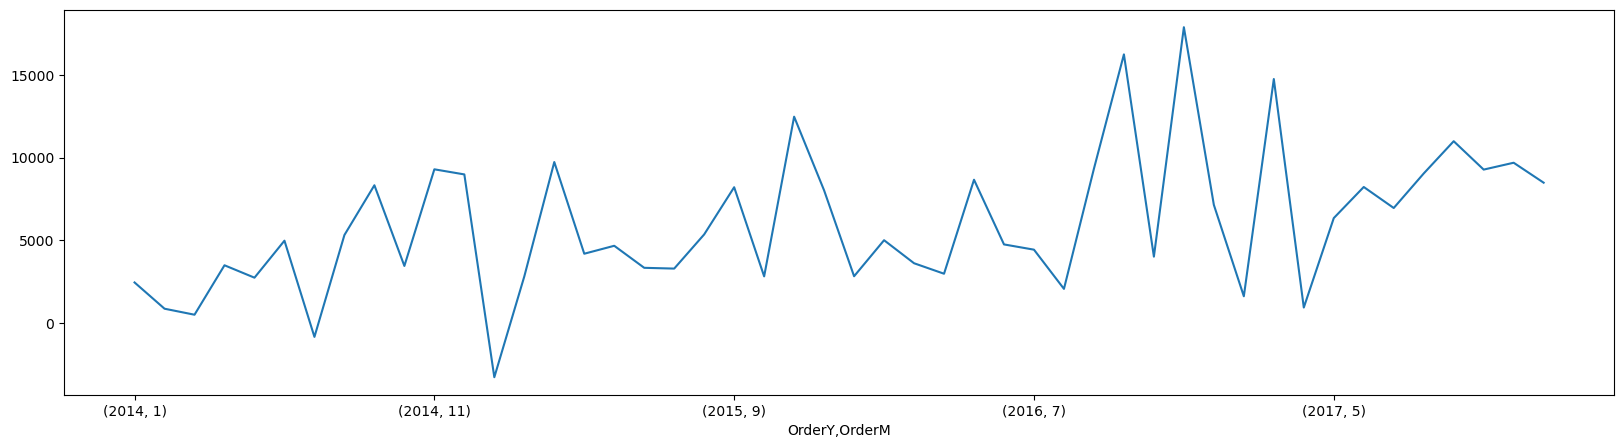

In [58]:
plt.figure(figsize=(20,5))
df.groupby(['OrderY','OrderM'])['Profit'].sum().plot();

### Saving file Json

In [95]:
data_orang = [
    {
        "nama": "John Doe",
        "umur": 30,
        "pekerjaan": "Insinyur Perangkat Lunak",
        "gaji": 70000,
        "pendidikan": "Sarjana Teknik Informatika",
        "gender": "Laki-Laki"
    },
    {
        "nama": "Jane Smith",
        "umur": 28,
        "pekerjaan": "Dokter",
        "gaji": 90000,
        "pendidikan": "Sarjana Kedokteran",
        "gender": "Perempuan"
    },
    {
        "nama": "Michael Johnson",
        "umur": 35,
        "pekerjaan": "Guru",
        "gaji": 50000,
        "pendidikan": "Sarjana Pendidikan",
        "gender": "Laki-Laki"
    },
    {
        "nama": "Emily Davis",
        "umur": 26,
        "pekerjaan": "Desainer Grafis",
        "gaji": 60000,
        "pendidikan": "Diploma Desain Grafis",
        "gender": "Perempuan"
    },
    {
        "nama": "Robert Wilson",
        "umur": 32,
        "pekerjaan": "Akuntan",
        "gaji": 75000,
        "pendidikan": "Sarjana Akuntansi",
        "gender": "Laki-Laki"
    },
    {
        "nama": "Sarah Brown",
        "umur": 29,
        "pekerjaan": "Pengacara",
        "gaji": 85000,
        "pendidikan": "Sarjana Hukum",
        "gender": "Perempuan"
    },
    {
        "nama": "Kevin Lee",
        "umur": 27,
        "pekerjaan": "Dokter Gigi",
        "gaji": 82000,
        "pendidikan": "Sarjana Kedokteran Gigi",
        "gender": "Laki-Laki"
    },
    {
        "nama": "Olivia Taylor",
        "umur": 31,
        "pekerjaan": "Psikolog",
        "gaji": 68000,
        "pendidikan": "Sarjana Psikologi",
        "gender": "Perempuan"
    },
    {
        "nama": "David Martin",
        "umur": 34,
        "pekerjaan": "Insinyur Elektrikal",
        "gaji": 72000,
        "pendidikan": "Sarjana Teknik Elektro",
        "gender": "Laki-Laki"
    },
    {
        "nama": "Mia Wilson",
        "umur": 25,
        "pekerjaan": "Pengembang Web",
        "gaji": 65000,
        "pendidikan": "Sarjana Teknik Informatika",
        "gender": "Perempuan"
    }
]


In [101]:
data_orang

[{'nama': 'John Doe',
  'umur': 30,
  'pekerjaan': 'Insinyur Perangkat Lunak',
  'gaji': 70000,
  'pendidikan': 'Sarjana Teknik Informatika',
  'gender': 'Laki-Laki'},
 {'nama': 'Jane Smith',
  'umur': 28,
  'pekerjaan': 'Dokter',
  'gaji': 90000,
  'pendidikan': 'Sarjana Kedokteran',
  'gender': 'Perempuan'},
 {'nama': 'Michael Johnson',
  'umur': 35,
  'pekerjaan': 'Guru',
  'gaji': 50000,
  'pendidikan': 'Sarjana Pendidikan',
  'gender': 'Laki-Laki'},
 {'nama': 'Emily Davis',
  'umur': 26,
  'pekerjaan': 'Desainer Grafis',
  'gaji': 60000,
  'pendidikan': 'Diploma Desain Grafis',
  'gender': 'Perempuan'},
 {'nama': 'Robert Wilson',
  'umur': 32,
  'pekerjaan': 'Akuntan',
  'gaji': 75000,
  'pendidikan': 'Sarjana Akuntansi',
  'gender': 'Laki-Laki'},
 {'nama': 'Sarah Brown',
  'umur': 29,
  'pekerjaan': 'Pengacara',
  'gaji': 85000,
  'pendidikan': 'Sarjana Hukum',
  'gender': 'Perempuan'},
 {'nama': 'Kevin Lee',
  'umur': 27,
  'pekerjaan': 'Dokter Gigi',
  'gaji': 82000,
  'pendidi

In [102]:
import json
# Menyimpan data ke dalam file JSON
with open('identitas_orang.json', 'w') as json_file:
    json.dump(data_orang, json_file, indent=4)

print("Data telah disimpan dalam file JSON.")

Data telah disimpan dalam file JSON.
